In [25]:
import pandas as pd
# Correctly loading all datasets again in this session
green_non_organic_cabbage = pd.read_csv('Datasets/Green_Non_Organic_Cabbage_Merged.csv')
red_onion = pd.read_csv('Datasets/Integrated_Red_Onion_Data.csv')
white_onion = pd.read_csv('Datasets/Integrated_White_Onion_Data.csv')
yellow_onion = pd.read_csv('Datasets/Integrated_Yellow_Onion_Data.csv')
red_cabbage = pd.read_csv('Datasets/Red_Cabbage_Merged.csv')

# Getting statistical summary of the datasets
datasets_summary = {
    "Green Non-Organic Cabbage": green_non_organic_cabbage.describe(),
    "Red Onion": red_onion.describe(),
    "White Onion": white_onion.describe(),
    "Yellow Onion": yellow_onion.describe(),
    "Red Cabbage": red_cabbage.describe()
}

datasets_summary

{'Green Non-Organic Cabbage':        Organic  Environment  Weighted Avg Price    AvgTempC    AvgTempF  \
 count      0.0          0.0          499.000000  499.000000  499.000000   
 mean       NaN          NaN            0.555210   11.133664   52.023148   
 std        NaN          NaN            0.086694    1.024730    1.858637   
 min        NaN          NaN            0.340000    5.857143   42.523810   
 25%        NaN          NaN            0.490000   10.983496   51.750146   
 50%        NaN          NaN            0.540000   11.454952   52.617021   
 75%        NaN          NaN            0.610000   11.646456   52.957022   
 max        NaN          NaN            0.890000   12.228261   53.913043   
 
        AvgPrecipitation  AvgPressure  
 count        499.000000   499.000000  
 mean           0.087633  1014.380493  
 std            0.011906     2.616589  
 min            0.078378   993.750000  
 25%            0.082154  1014.503720  
 50%            0.085293  1015.217821  
 75% 

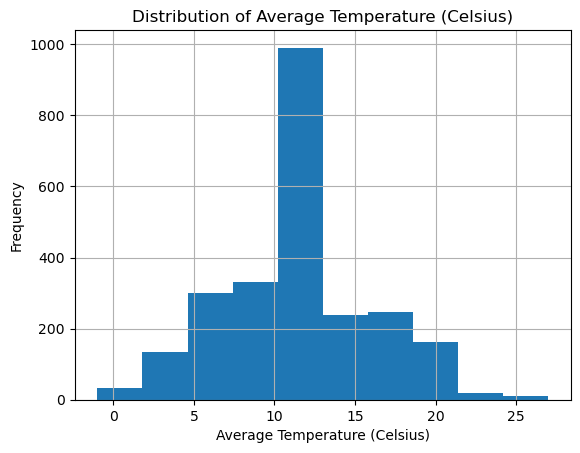

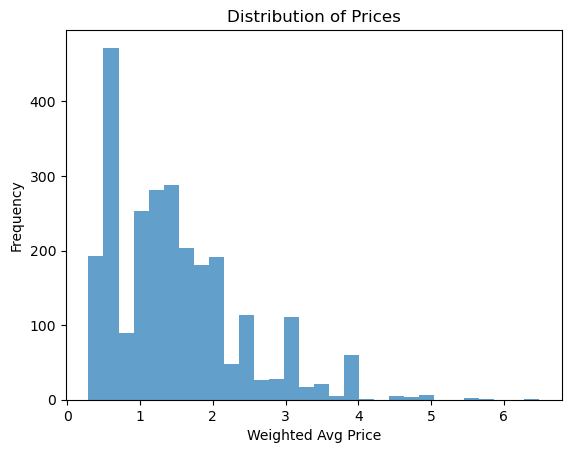

In [24]:
import matplotlib.pyplot as plt

# Histogram of Average Temperature
combined_data['AvgTempC'].hist()
plt.title('Distribution of Average Temperature (Celsius)')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

# Histogram of prices
plt.hist(combined_data['Weighted Avg Price'], bins=30, alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Weighted Avg Price')
plt.ylabel('Frequency')
plt.show()


In [26]:
# List of datasets
datasets = [green_non_organic_cabbage, red_onion, white_onion, yellow_onion, red_cabbage]

# Columns to drop
columns_to_drop = ['Organic', 'Environment', 'Region', 'Class']

# Dropping the columns from each dataset
for dataset in datasets:
    dataset.drop(columns=[col for col in columns_to_drop if col in dataset.columns], inplace=True)

# Combining the datasets
combined_data = pd.concat(datasets, ignore_index=True)

# Display the combined data to verify the columns are dropped
print(combined_data.head())


         Date Commodity           Variety       Unit Number of Stores  \
0  2014-01-03   CABBAGE  ROUND GREEN TYPE  per pound            5,427   
1  2014-01-10   CABBAGE  ROUND GREEN TYPE  per pound            4,251   
2  2014-01-17   CABBAGE  ROUND GREEN TYPE  per pound            2,678   
3  2014-01-24   CABBAGE  ROUND GREEN TYPE  per pound            4,064   
4  2014-01-31   CABBAGE  ROUND GREEN TYPE  per pound            1,167   

   Weighted Avg Price  AvgTempC   AvgTempF  AvgPrecipitation  AvgPressure  \
0                0.43  7.666667  45.666667          0.220833   993.750000   
1                0.45  7.500000  45.500000          0.176250  1000.525000   
2                0.45  6.882353  44.294118          0.145588  1001.772059   
3                0.52  6.250000  43.250000          0.123958  1002.796875   
4                0.50  6.035714  42.892857          0.120982  1002.049107   

  Month  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  


In [27]:
import numpy as np

# Convert 'Date' to datetime, automatically inferring the datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce', infer_datetime_format=True)

# After conversion, check if there are any NaT (Not a Time) entries, which indicate failed conversions
print("Number of NaT entries:", combined_data['Date'].isna().sum())

# Extract day, month, and year from 'Date'
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Year'] = combined_data['Date'].dt.year

# Create rolling averages for temperature and precipitation
combined_data.sort_values(by='Date', inplace=True)  # Ensure data is sorted by date for rolling calculations
combined_data['RollingAvgTempC'] = combined_data.groupby('Commodity')['AvgTempC'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
combined_data['RollingAvgPrecip'] = combined_data.groupby('Commodity')['AvgPrecipitation'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# One-hot encode categorical variables 'Commodity' and 'Variety'
combined_data = pd.get_dummies(combined_data, columns=['Commodity', 'Variety'], drop_first=True)

# Display the updated DataFrame to verify changes
combined_data.head(), combined_data.info()


Number of NaT entries: 1705
<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 0 to 2203
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      896 non-null    datetime64[ns]
 1   Unit                      2601 non-null   object        
 2   Number of Stores          2601 non-null   object        
 3   Weighted Avg Price        2601 non-null   float64       
 4   AvgTempC                  2463 non-null   float64       
 5   AvgTempF                  2463 non-null   float64       
 6   AvgPrecipitation          2463 non-null   float64       
 7   AvgPressure               2463 non-null   float64       
 8   Month                     896 non-null    float64       
 9   Day                       896 non-null    float64       
 10  Year                      896 non-null    float64       
 11  RollingAvgTempC           2601 non-null   float64       
 1

C:\Users\prave\AppData\Local\Temp\ipykernel_56900\3405144997.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce', infer_datetime_format=True)


(           Date       Unit Number of Stores  Weighted Avg Price  AvgTempC  \
 0    2014-01-03  per pound            5,427                0.43  7.666667   
 2204 2014-01-10  per pound               37                0.49  7.500000   
 1    2014-01-10  per pound            4,251                0.45  7.500000   
 2    2014-01-17  per pound            2,678                0.45  6.882353   
 2205 2014-01-17  per pound                6                0.69  6.882353   
 
        AvgTempF  AvgPrecipitation  AvgPressure  Month   Day    Year  \
 0     45.666667          0.220833   993.750000    1.0   3.0  2014.0   
 2204  45.500000          0.176250  1000.525000    1.0  10.0  2014.0   
 1     45.500000          0.176250  1000.525000    1.0  10.0  2014.0   
 2     44.294118          0.145588  1001.772059    1.0  17.0  2014.0   
 2205  44.294118          0.145588  1001.772059    1.0  17.0  2014.0   
 
       RollingAvgTempC  RollingAvgPrecip  Commodity_ONIONS DRY  \
 0            7.666667        

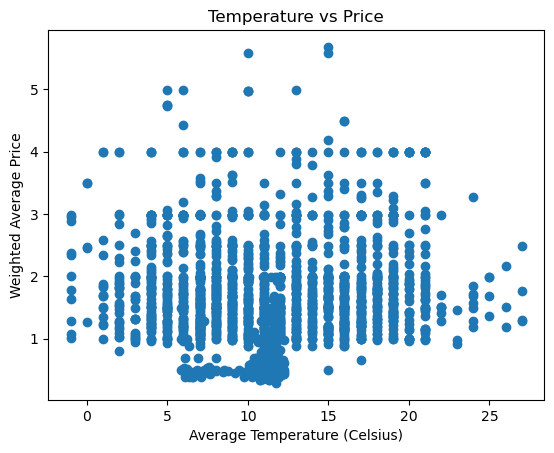

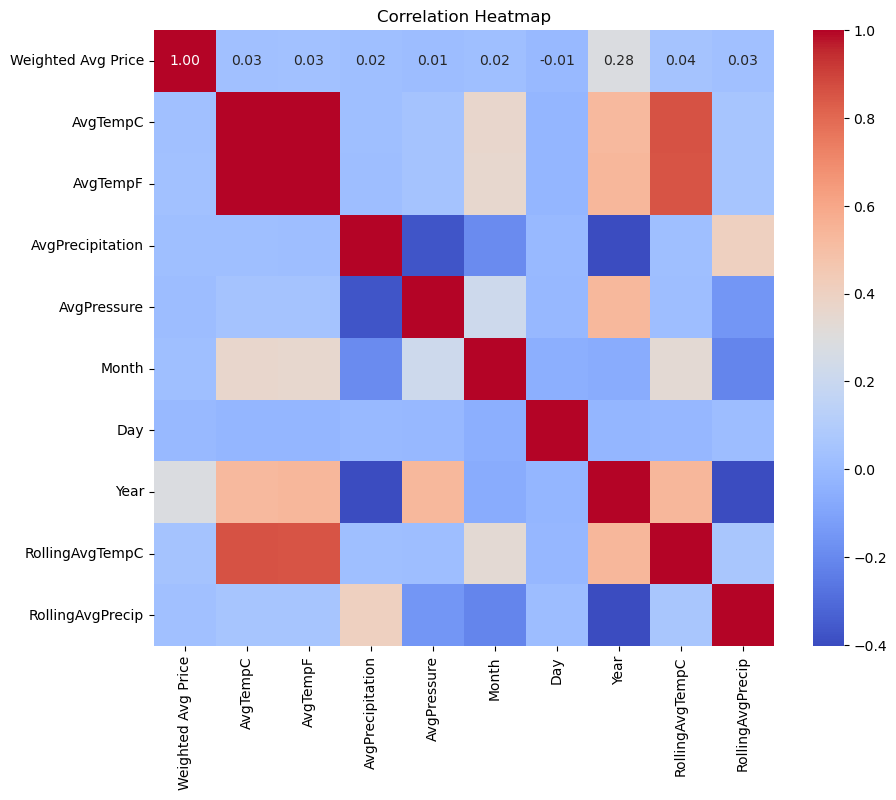

In [13]:
# Scatter Plot for Temperature vs Price
plt.scatter(combined_data['AvgTempC'], combined_data['Weighted Avg Price'])
plt.title('Temperature vs Price')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Weighted Average Price')
plt.show()

# Correlation Heatmap
corr = combined_data.select_dtypes(include=[np.number]).corr()
# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


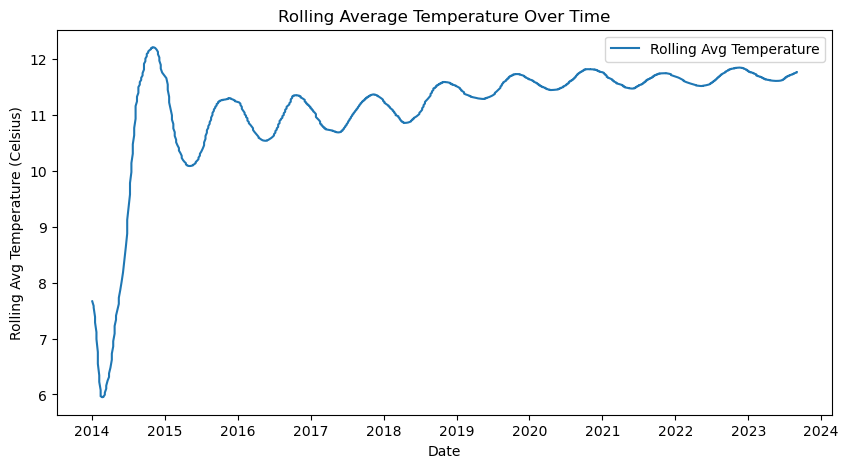

In [23]:
# Check the columns to ensure 'Commodity' is present
# Rolling average price plot
plt.figure(figsize=(10, 5))
plt.plot(combined_data['Date'], combined_data['RollingAvgTempC'], label='Rolling Avg Temperature')
plt.title('Rolling Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Avg Temperature (Celsius)')
plt.legend()
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Explicitly enable experimental features
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming combined_data is already loaded and preprocessed

# Define the feature matrix (X) and target vector (y)
X = combined_data.drop(['Weighted Avg Price', 'Date', 'Unit', 'Number of Stores'], axis=1)
y = combined_data['Weighted Avg Price']

# Setup the pipeline with advanced imputation and polynomial features
pipeline = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),  # Advanced multivariate imputation
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial features
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Expanded grid search parameters
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.7, 0.85],
    'regressor__min_samples_split': [2, 4, 6],
    'regressor__min_samples_leaf': [1, 3, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X, y)  # Using full dataset for training and cross-validation

# Best model results
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 200, 'regressor__subsample': 0.85}
Best cross-validated R² score: 0.09860253098983777


In [30]:
# Optional: Additional evaluation on a holdout set or further validation
# Splitting the data to evaluate the best model explicitly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f"Mean Squared Error on Test Set: {best_mse}")
print(f"R^2 Score on Test Set: {best_r2}")

Mean Squared Error on Test Set: 0.1450261696010538
R^2 Score on Test Set: 0.8273919290378988


In [31]:
import pandas as pd

# Example of creating new prediction data with the exact structure shown in your combined dataset
new_data = pd.DataFrame({
    'Date': pd.to_datetime(['2022-04-01']),  # Example date
    'Unit': ['per pound'],  # Consistent unit
    'Number of Stores': [5000],  # Example number of stores
    'Weighted Avg Price': [0.50],  # Example average price (not needed for prediction, included for structure)
    'AvgTempC': [10.0],  # Example average temperature in Celsius
    'AvgTempF': [50.0],  # Example average temperature in Fahrenheit
    'AvgPrecipitation': [0.25],  # Example precipitation
    'AvgPressure': [1000.0],  # Example atmospheric pressure
    'Month': [4],  # Example month
    'Day': [1],  # Example day
    'Year': [2022],  # Example year
    'RollingAvgTempC': [10.0],  # Example rolling average temperature in Celsius
    'RollingAvgPrecip': [0.25],  # Example rolling average precipitation
    'Commodity_ONIONS DRY': [1],  # Example commodity flag
    'Variety_RED TYPE': [0],  # Example variety flags
    'Variety_ROUND GREEN TYPE': [0],
    'Variety_WHITE': [0],
    'Variety_YELLOW': [1]  # Assuming this new data is for the yellow variety
})

# Convert boolean columns to the correct type if needed
boolean_columns = ['Commodity_ONIONS DRY', 'Variety_RED TYPE', 'Variety_ROUND GREEN TYPE', 'Variety_WHITE', 'Variety_YELLOW']
for col in boolean_columns:
    new_data[col] = new_data[col].astype(bool)

# Now predict using the trained model (assuming best_model is already trained and available)
predictions = best_model.predict(new_data.drop(columns=['Weighted Avg Price', 'Date', 'Unit', 'Number of Stores']))
print("Predicted Prices:", predictions)


Predicted Prices: [2.35533097]
